# Intro

## Features

### Popularity indicators
- stargazers_count -> number of stars
- forks_count
- subscribers_count

### Features of projects
- size
- dependencies_count
- mainteiners_count
- contributors_count
- has_tests
- has_readme
- open_issues_count

In [1]:
import sys
import os
import numpy as np
import psycopg2

wk_dir = os.path.dirname(os.path.realpath('__file__'))
sys.path.append(
        os.path.abspath(os.path.join(wk_dir, '..')))

from source.helpers.db import execute, fetch

result = fetch('''
    SELECT stargazers_count, forks_count, 
            open_issues_count, size, subscribers_count, 
            dependencies_count, mainteiners_count,
            contributors_count, has_tests, has_readme
    FROM repos 
    WHERE has_readme is not Null
    ORDER BY RANDOM();
''')


X_tmp = []
Y_tmp = []
for r in result:
    y = [r[0], r[1], r[4]] # contains stargazers_count, forks_count, subscribers_count
    x = [r[2], r[3], r[5], r[6], r[7], int(r[8]), int(r[9])] 
    # contains open_issues_count, size, dependencies_count, mainteiners_count, 
    # contributors_count, has_tests, has_readme 
    X_tmp.append(x)
    Y_tmp.append(y)

    
X = np.array(X_tmp)
Y = np.array(Y_tmp)

Connected to DB


In [2]:
column_sum = np.sum(X, axis=0)
has_tests_total = column_sum[5]
has_readme_total = column_sum[6]
total = X.shape[0]
print("Packages that have tests: {} / {}".format(has_tests_total, total))
print("Packages that have readme file: {} / {}".format(has_readme_total, total))


Packages that have tests: 106968 / 140012
Packages that have readme file: 126641 / 140012


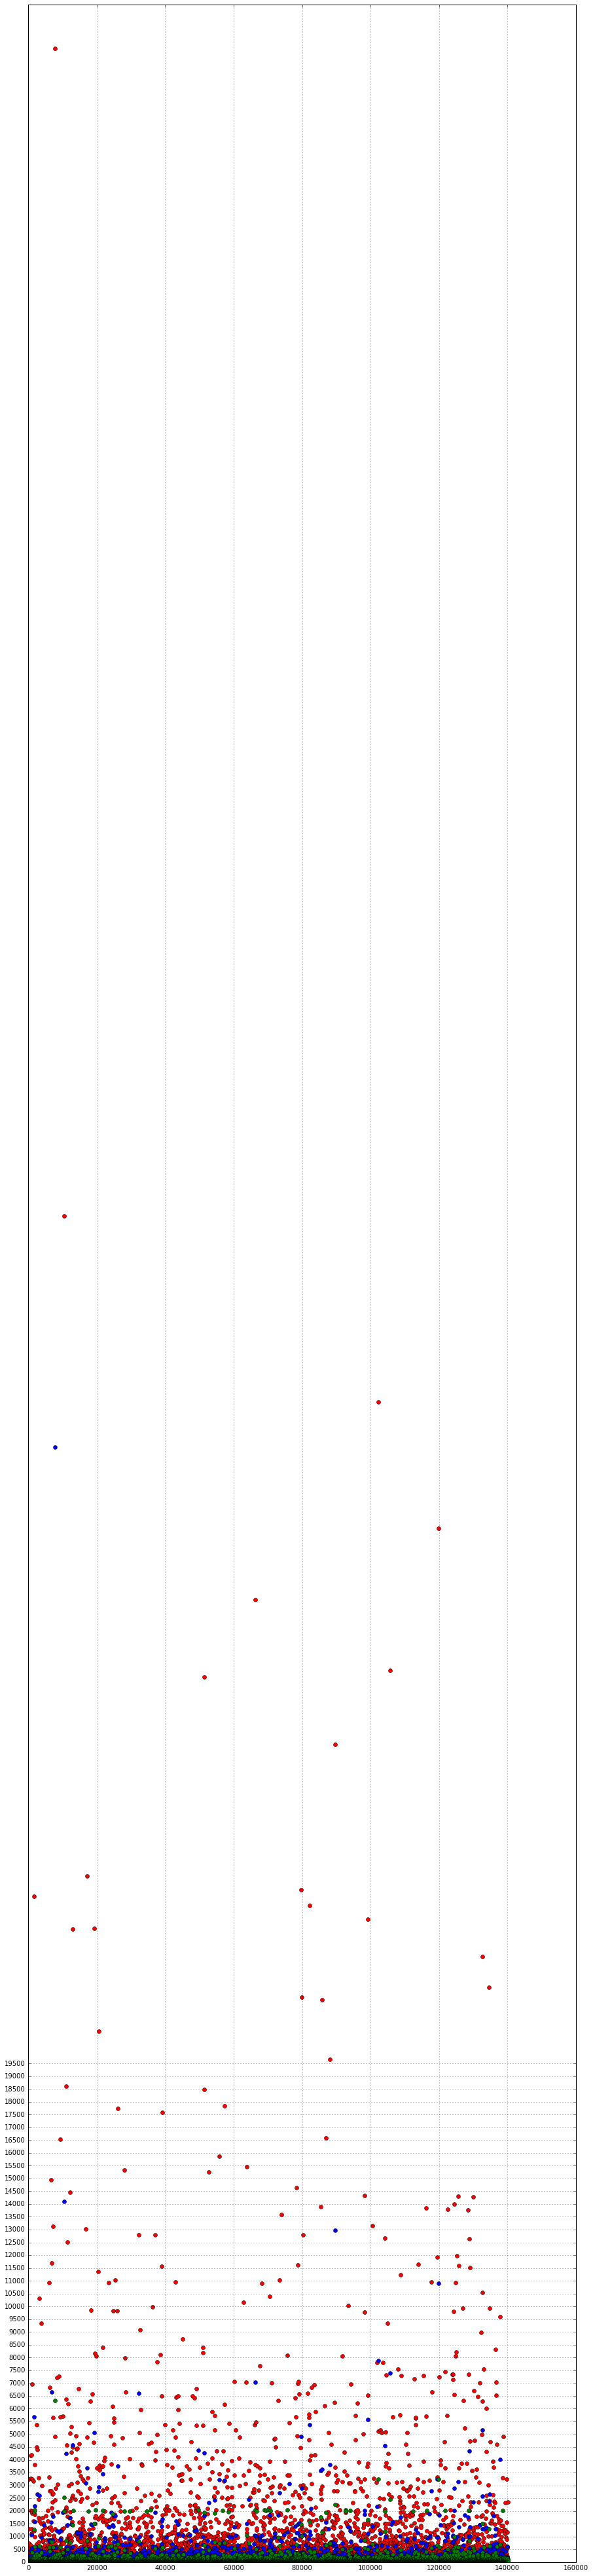

In [45]:
%matplotlib inline

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 70), dpi=80)
plt.plot(Y[:, 0], 'ro')
plt.plot(Y[:, 1], 'bo')
plt.plot(Y[:, 2], 'go')
plt.yticks( np.arange(0, 20000, 500.0))
plt.grid()
plt.show()

In the graph above we can see that red dots (number of stars) stand out and differentiate the repos the most. Even though most of the repos have very low stars count.

In [46]:
from scipy import stats

def print_mean(X):
    print("Mean: ", np.mean(X))

        
def print_median(X):
    print("Median: ", np.median(X))
    
def print_mode(X):
    print("Mode: ", stats.mode(X))

def print_quartiles(X):
    print("Q1: ", np.percentile(X, 25))
    print("Q2: ", np.percentile(X, 50))
    print("Q3: ", np.percentile(X, 75))
    
def print_variance(X):
    print("Variance: ", np.var(X))

def print_analysis(X):
    print_mean(X)
    print_median(X)
    print_mode(X)
    print_quartiles(X)
    print_variance(X)

In [47]:

# Stars feature
print("Stars")
print_analysis(Y[:, 0])
print("===========================")

print("Forks")
print_analysis(Y[:, 1])
print("===========================")

print("Subribers")
print_analysis(Y[:, 2])
print("===========================")



Stars
Mean:  43.8520198269
Median:  1.0
Mode:  ModeResult(mode=array([0]), count=array([59313]))
Q1:  0.0
Q2:  1.0
Q3:  5.0
Variance:  354799.487265
Forks
Mean:  7.52033397137
Median:  0.0
Mode:  ModeResult(mode=array([0]), count=array([87359]))
Q1:  0.0
Q2:  0.0
Q3:  1.0
Variance:  25217.217775
Subribers
Mean:  5.40877924749
Median:  1.0
Mode:  ModeResult(mode=array([1]), count=array([80185]))
Q1:  1.0
Q2:  1.0
Q3:  2.0
Variance:  2145.9603886


In [26]:
    # contains open_issues_count, size, dependencies_count, mainteiners_count, 
    # contributors_count, has_tests, has_readme 

print("Open issues count")
print_analysis(X[:, 0])
print("===========================")

print("Size")
print_analysis(X[:, 1])
print("===========================")

print("Dependencies")
print_analysis(X[:, 2])
print("===========================")

print("Mainteiners")
print_analysis(X[:, 3])
print("===========================")

print("Contributors")
print_analysis(X[:, 4])
print("===========================")

Open issues count
Mean:  2.0646373168
Median:  0.0
Mode:  ModeResult(mode=array([0]), count=array([100728]))
Q1:  0.0
Q2:  0.0
Q3:  1.0
Variance:  355.414014744
Size
Mean:  975.373789389
Median:  128.0
Mode:  ModeResult(mode=array([3]), count=array([2743]))
Q1:  20.0
Q2:  128.0
Q3:  220.0
Variance:  107151006.817
Dependencies
Mean:  2.67637773905
Median:  1.0
Mode:  ModeResult(mode=array([0]), count=array([43877]))
Q1:  0.0
Q2:  1.0
Q3:  3.0
Variance:  19.8529365464
Mainteiners
Mean:  1.17544210496
Median:  1.0
Mode:  ModeResult(mode=array([1]), count=array([128256]))
Q1:  1.0
Q2:  1.0
Q3:  1.0
Variance:  1.3934122799
Contributors
Mean:  0.251571293889
Median:  0.0
Mode:  ModeResult(mode=array([0]), count=array([130053]))
Q1:  0.0
Q2:  0.0
Q3:  0.0
Variance:  28.4618597286


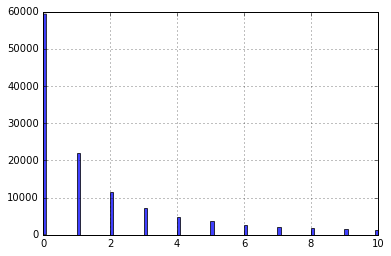

In [58]:

import matplotlib.mlab as mlab

# the histogram of the data
n, bins, patches = plt.hist(Y[:, 0], 100, range=(0, 10), normed=False, alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.grid(True)

plt.show()

This plot shows histogram for 

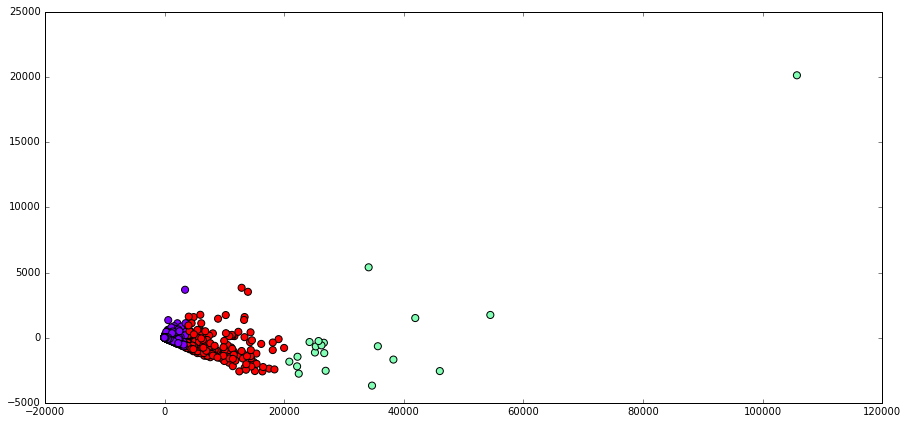

In [7]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(Y)
transformed = pca.transform(Y)

est = KMeans(3)
est.fit(transformed)

y_kmeans = est.predict(transformed)
plt.figure(figsize=(15, 7), dpi=80)
plt.scatter(transformed[:, 0], transformed[:, 1], c=y_kmeans, s=50, cmap='rainbow');

/Users/samuelsusla/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


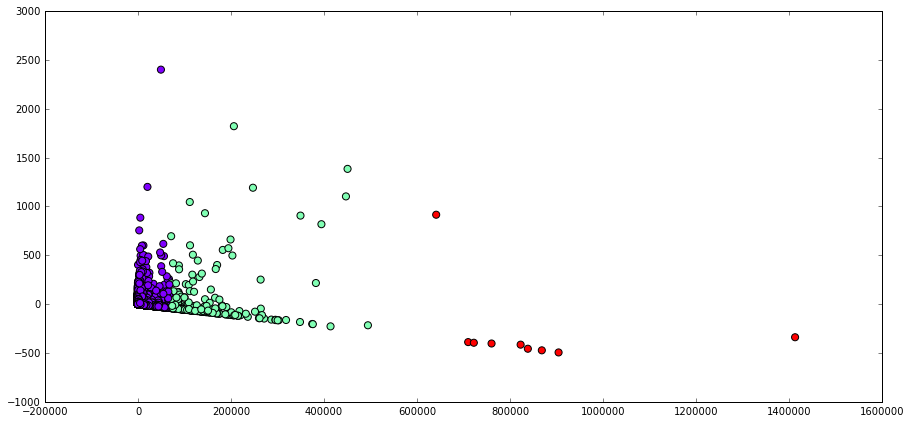

In [8]:
est = KMeans(3)  # 4 clusters
est.fit(X)

x_kmeans = est.predict(X)


pca = PCA(n_components=2)
pca.fit(X)
transformed = pca.transform(X)

plt.figure(figsize=(15, 7), dpi=80)
plt.scatter(transformed[:, 0], transformed[:, 1], c=x_kmeans, s=50, cmap='rainbow');